In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/train',)

Found 2900 files belonging to 4 classes.


In [7]:
labels = os.listdir('/content/drive/MyDrive/train')

In [8]:
labels

['Closed', 'Open', 'no_yawn', 'yawn']

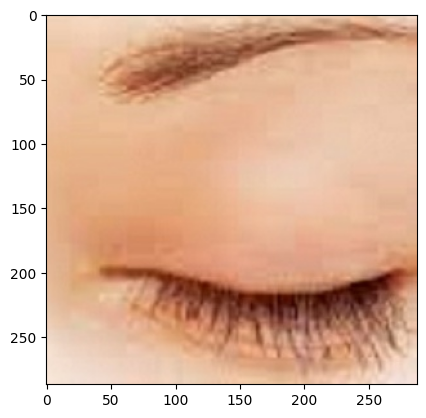

In [9]:
plt.imshow(plt.imread('/content/drive/MyDrive/train/Closed/_100.jpg'))

In [10]:
a = plt.imread('/content/drive/MyDrive/train/yawn/10.jpg')

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]], dtype=uint8)
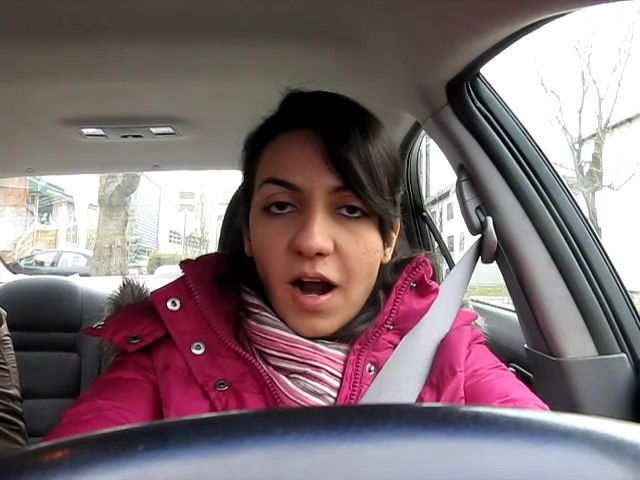

In [11]:
a

In [12]:
a.shape

(480, 640, 3)

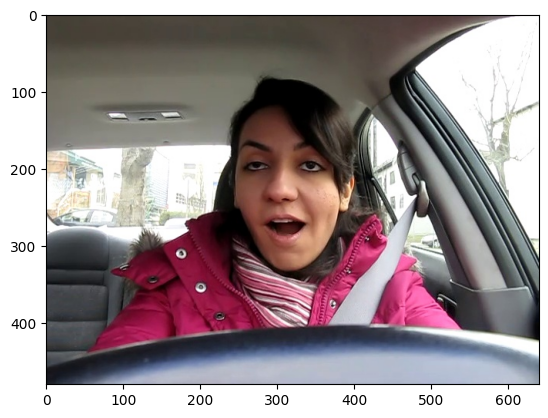

In [13]:
plt.imshow(plt.imread('/content/drive/MyDrive/train/yawn/5.jpg'))

In [14]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [15]:
train_data = train_data_gen.flow_from_directory("/content/drive/MyDrive/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [16]:
validation_data = train_data_gen.flow_from_directory("/content/drive/MyDrive/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [17]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [18]:
test_data = test_data_gen.flow_from_directory("/content/drive/MyDrive/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [19]:
train_data

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [21]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))



In [22]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [23]:
model.build(input_shape=(80, 80, 3))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [25]:
validation_steps = len(test_data)
validation_steps

363

In [26]:
hist = model.fit(train_data, epochs=5, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/5
291/291 [==============================] - 592s 2s/step - loss: 0.7568 - accuracy: 0.6269 - val_loss: 0.4895 - val_accuracy: 0.7317
Epoch 2/5
291/291 [==============================] - 283s 974ms/step - loss: 0.4317 - accuracy: 0.7790 - val_loss: 0.3718 - val_accuracy: 0.7893
Epoch 3/5
291/291 [==============================] - 287s 984ms/step - loss: 0.3710 - accuracy: 0.8186 - val_loss: 0.3368 - val_accuracy: 0.8200
Epoch 4/5
291/291 [==============================] - 344s 1s/step - loss: 0.3467 - accuracy: 0.8333 - val_loss: 0.3038 - val_accuracy: 0.8476
Epoch 5/5
291/291 [==============================] - 346s 1s/step - loss: 0.3180 - accuracy: 0.8505 - val_loss: 0.3044 - val_accuracy: 0.8497


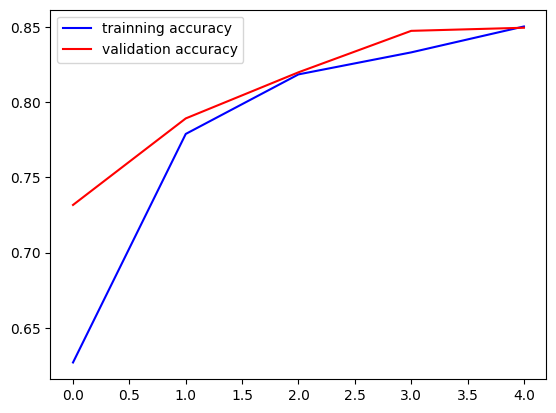

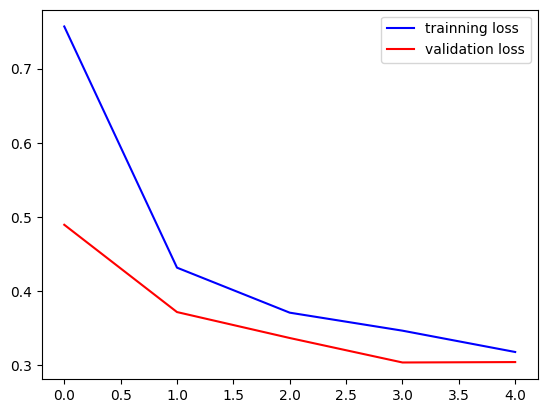

In [27]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()


In [28]:
model.save("model.h5")

In [29]:
loaded_model = tf.keras.models.load_model('model.h5')

In [30]:
class_names = ['closed','Open', 'no_yawn', 'yawn']

In [31]:
class_names

['closed', 'Open', 'no_yawn', 'yawn']

In [40]:
image_size = (80, 80)
img = Image.open("/content/drive/MyDrive/train/Closed/_102.jpg").resize(image_size)
img = np.array(img)/255.0
img.shape

(80, 80, 3)

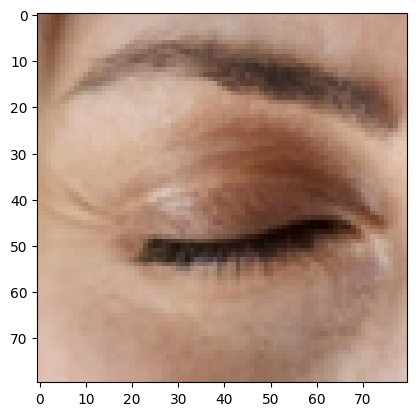

In [41]:
plt.imshow(img)

In [42]:
predictions = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 40ms/step


In [43]:
predictions.shape

(1, 4)

In [44]:
predicted_label_index = np.argmax(predictions, axis = 1)

closed


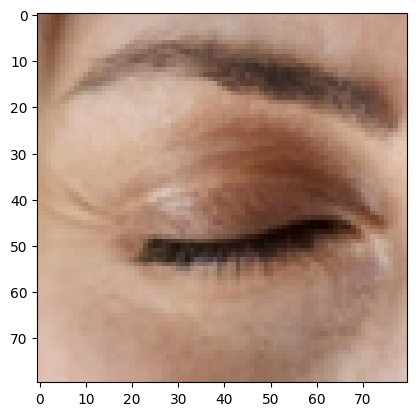

In [45]:
predicted_class = class_names[predicted_label_index[0]]

print(predicted_class)

plt.imshow(img)
plt.show()

Closed eyes


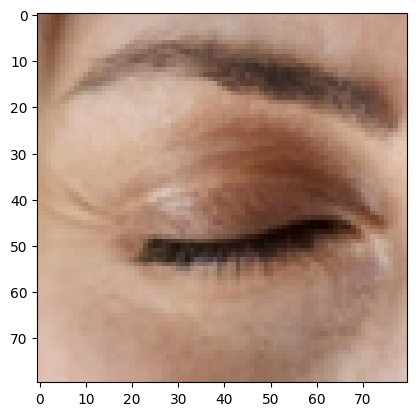

In [46]:
if (predicted_label_index==0):
    print('Closed eyes')

elif predicted_label_index==1:
    print('Open eyes')

elif predicted_label_index==2:
    print('No Yawing detected')

elif predicted_label_index==3:
    print('Yawning detected')

plt.imshow(img)
plt.show()

Drowsiness detected


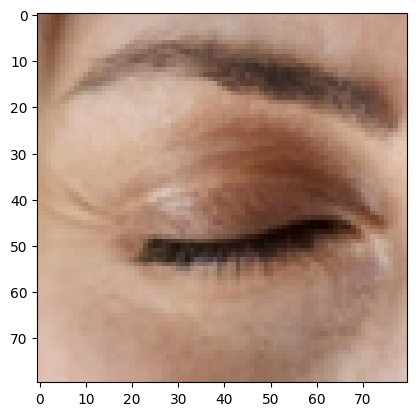

In [47]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness detected')

elif (predicted_label_index==3):
    print('Drowsiness detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No drowsiness detected')

elif predicted_label_index==1:
    print('No drowsiness detected')

plt.imshow(img)
plt.show()